In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/E6893_final_project"

In [ ]:
"""
Major air quality within the US between 2015-2025

20150821 - 20150825 | 47.66°N, −117.43°W | Spokane, WA | 72785024157.csv | Northwest wildfires
20151215 - 20151219 | 34.29°N, −118.55°W | Porter Ranch, Los Angeles, CA | No ISD data | Aliso Canyon Gas Leak
20171009 - 20171013 | 38.44°N, −122.71°W | Santa Rosa, CA | 72495723213.csv | California wildfires
20180601 - 20180605 | 19.50°N, −154.95°W | Puna District, HI | KAWAIHAE, HI US (99717399999.csv) HILO INTERNATIONAL AIRPORT 87, HI US (91285021504.csv)| Kīlauea Eruption
20181114 - 20181118 | 37.77°N, −122.42°W | San Francisco, CA | SAN FRANCISCO, CA US (99401699999.csv) SAN FRANCISCO INTERNATIONAL AIRPORT, CA US (72494023234.csv) | Camp Fire Smoke
20200624 - 20200628 | 29.76°N, −95.37°W  | Houston, TX | HOUSTON INTERCONTINENTAL AIRPORT, TX US (72243012960.csv) | Saharan Dust “Godzilla” Plume
20200911 - 20200915 | 45.52°N, −122.68°W | Portland, OR | PORTLAND INTERNATIONAL AIRPORT, OR US (72698024229.csv) | Western Megafire Siege
20210715 - 20210719 | 42.22°N, −121.78°W | Klamath Falls, OR | KLAMATH FALLS INTERNATIONAL AIRPORT, OR US (72589594236.csv) | Bootleg Fire Smoke
20230606 - 20230608 | 40.71°N, −74.01°W  | New York City, NY | NY CITY CENTRAL PARK, NY US (72505394728.csv) LAGUARDIA AIRPORT, NY US (72503014732.csv) | Canadian Wildfire Smoke
20250726 - 20250727 | 40.71°N, −74.01°W | New York City, NY | Canadian Wildfire Smoke


HMS data: https://www.ospo.noaa.gov/products/land/hms.html#data
ISD data: https://www.ncei.noaa.gov/access/search/data-search/global-hourly

"""

'\nMajor air quality within the US between 2015-2025\n\n20150821 - 20150825 | 47.66°N, −117.43°W | Spokane, WA | 72785024157.csv | Northwest wildfires\n20151215 - 20151219 | 34.29°N, −118.55°W | Porter Ranch, Los Angeles, CA | No ISD data | Aliso Canyon Gas Leak\n20171009 - 20171013 | 38.44°N, −122.71°W | Santa Rosa, CA | 72495723213.csv | California wildfires\n20180601 - 20180605 | 19.50°N, −154.95°W | Puna District, HI | KAWAIHAE, HI US (99717399999.csv) HILO INTERNATIONAL AIRPORT 87, HI US (91285021504.csv)| Kīlauea Eruption\n20181114 - 20181118 | 37.77°N, −122.42°W | San Francisco, CA | SAN FRANCISCO, CA US (99401699999.csv) SAN FRANCISCO INTERNATIONAL AIRPORT, CA US (72494023234.csv) | Camp Fire Smoke\n20200624 - 20200628 | 29.76°N, −95.37°W  | Houston, TX | HOUSTON INTERCONTINENTAL AIRPORT, TX US (72243012960.csv) | Saharan Dust “Godzilla” Plume\n20200911 - 20200915 | 45.52°N, −122.68°W | Portland, OR | PORTLAND INTERNATIONAL AIRPORT, OR US (72698024229.csv) | Western Megafire Si

In [ ]:
events_config = [
    {
        "event_id": "2015_spokane",
        "start_date": "2015-08-21",
        "end_date": "2015-08-25",
        "lat": 47.66,
        "lon": -117.43,
        "location": "Spokane, WA",
        "cause": "Northwest wildfires",
        "isd_files": ["72785024157.csv"],
    },
    {
        "event_id": "2015_porter_ranch",
        "start_date": "2015-12-15",
        "end_date": "2015-12-19",
        "lat": 34.29,
        "lon": -118.55,
        "location": "Porter Ranch, Los Angeles, CA",
        "cause": "Aliso Canyon Gas Leak",
        "isd_files": [],  # No ISD data
    },
    {
        "event_id": "2017_santa_rosa",
        "start_date": "2017-10-09",
        "end_date": "2017-10-13",
        "lat": 38.44,
        "lon": -122.71,
        "location": "Santa Rosa, CA",
        "cause": "California wildfires",
        "isd_files": ["72495723213.csv"],
    },
    {
        "event_id": "2018_puna_kilauea",
        "start_date": "2018-06-01",
        "end_date": "2018-06-05",
        "lat": 19.50,
        "lon": -154.95,
        "location": "Puna District, HI",
        "cause": "Kīlauea Eruption",
        "isd_files": [
            "99717399999.csv",   # KAWAIHAE, HI US
            "91285021504.csv",   # HILO INTERNATIONAL AIRPORT 87, HI US
        ],
    },
    {
        "event_id": "2018_sf_camp_fire",
        "start_date": "2018-11-14",
        "end_date": "2018-11-18",
        "lat": 37.77,
        "lon": -122.42,
        "location": "San Francisco, CA",
        "cause": "Camp Fire Smoke",
        "isd_files": [
            "99401699999.csv",   # SAN FRANCISCO, CA US
            "72494023234.csv",   # SAN FRANCISCO INTERNATIONAL AIRPORT, CA US
        ],
    },
    {
        "event_id": "2020_houston_godzilla_dust",
        "start_date": "2020-06-24",
        "end_date": "2020-06-28",
        "lat": 29.76,
        "lon": -95.37,
        "location": "Houston, TX",
        "cause": "Saharan Dust “Godzilla” Plume",
        "isd_files": [
            "72243012960.csv",   # HOUSTON INTERCONTINENTAL AIRPORT, TX US
        ],
    },
    {
        "event_id": "2020_portland_megafire",
        "start_date": "2020-09-11",
        "end_date": "2020-09-15",
        "lat": 45.52,
        "lon": -122.68,
        "location": "Portland, OR",
        "cause": "Western Megafire Siege",
        "isd_files": [
            "72698024229.csv",   # PORTLAND INTERNATIONAL AIRPORT, OR US
        ],
    },
    {
        "event_id": "2021_klamath_bootleg",
        "start_date": "2021-07-15",
        "end_date": "2021-07-19",
        "lat": 42.22,
        "lon": -121.78,
        "location": "Klamath Falls, OR",
        "cause": "Bootleg Fire Smoke",
        "isd_files": [
            "72589594236.csv",   # KLAMATH FALLS INTERNATIONAL AIRPORT, OR US
        ],
    },
    {
        "event_id": "2023_nyc_canadian_smoke",
        "start_date": "2023-06-06",
        "end_date": "2023-06-08",
        "lat": 40.71,
        "lon": -74.01,
        "location": "New York City, NY",
        "cause": "Canadian Wildfire Smoke",
        "isd_files": [
            "72505394728.csv",   # NY CITY CENTRAL PARK, NY US
            "72503014732.csv",   # LAGUARDIA AIRPORT, NY US
        ],
    },
    {
        "event_id": "2025_nyc_canadian_smoke",
        "start_date": "2025-07-26",
        "end_date": "2025-07-27",
        "lat": 40.71,
        "lon": -74.01,
        "location": "New York City, NY",
        "cause": "Canadian Wildfire Smoke",
        "isd_files": [
            "72505394728_2025.csv",   # NY CITY CENTRAL PARK, NY US
            "72503014732_2025.csv",   # LAGUARDIA AIRPORT, NY US
        ],
    },
]

# Read HMS Smoke data

In [ ]:
import geopandas as gpd
import pandas as pd


def get_hms_smoke(date_string):
    hms_path = f"/content/drive/MyDrive/E6893_final_project/hms_smoke/hms_smoke{date_string}.zip"

    hms = gpd.read_file(hms_path).to_crs(4326)

    hms["Start"] = pd.to_datetime(hms["Start"].astype(str).str.strip(), format="%Y%j %H%M", utc=True)
    hms["End"]   = pd.to_datetime(hms["End"].astype(str).str.strip(),   format="%Y%j %H%M", utc=True)

    return hms

# Read Purpleair sensor data

In [ ]:
from pathlib import Path
import json, gzip

def load_json_auto(path):
    p = Path(path)
    if p.suffix == ".gz":
        with gzip.open(p, "rt", encoding="utf-8") as f:
            return json.load(f)
    with p.open("r", encoding="utf-8") as f:
        return json.load(f)

def save_json_auto(path, data, indent=2):
    p = Path(path)
    p.parent.mkdir(parents=True, exist_ok=True)
    if p.suffix == ".gz":
        with gzip.open(p, "wt", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=indent)
    else:
        with p.open("w", encoding="utf-8") as f:
            json.dump(data, f, ensure_ascii=False, indent=indent)

In [ ]:
API = "https://api.purpleair.com/v1"
HEAD = {"X-API-Key": "INSERT_API_KEY"}

In [ ]:
import requests, pandas as pd, time

# 1) discover sensors in bbox
def get_sensors(nwlng, nwlat, selng, selat, location_type):
    params = dict(fields="sensor_index,latitude,longitude,location_type",
                location_type=location_type, nwlng=nwlng, nwlat=nwlat, selng=selng, selat=selat) # location_type" outdoor(0) vs indoor(1)
    path = PATH + f"/sensors/{nwlng=}_{nwlat=}_{selng=}_{selat}/{location_type=}/readings.gzip"
    try:
        s = load_json_auto(path)
    except:
        s = requests.get(f"{API}/sensors", params=params, headers=HEAD).json()
        save_json_auto(path, s)
    return pd.DataFrame(s["data"], columns=s["fields"])



In [ ]:
# 2) hourly history for one sensor
def get_io_history(outdoor, indoor, o_idx, i_idx, date):
    sid_out = int(outdoor["sensor_index"].iloc[o_idx])
    sid_in = int(indoor["sensor_index"].iloc[i_idx])

    ts = pd.Timestamp(date)
    if ts.tzinfo is None:
        ts = ts.tz_localize("UTC")
    else:
        ts = ts.tz_convert("UTC")

    start_ts = ts
    end_ts   = ts + pd.Timedelta(days=1)

    start = int(start_ts.timestamp())
    end   = int(end_ts.timestamp())

    hparams = dict(start_timestamp=start, end_timestamp=end, average=60,
                fields="pm2.5_atm,pm2.5_alt,temperature,humidity,pressure")

    def get_sensor_readings(sid, start, end, hparams):
        path = PATH + f"/sensors/{sid=}/{hparams=}/readings.gzip"
        try:
            h = load_json_auto(path)
        except:
            h = requests.get(f"{API}/sensors/{sid}/history", params=hparams, headers=HEAD).json()
            save_json_auto(path, h)
        hist = pd.DataFrame(h["data"], columns=h["fields"])
        hist["time"] = pd.to_datetime(hist["time_stamp"], unit="s", utc=True) if "time_stamp" in hist else pd.NaT
        return hist

    out_history = get_sensor_readings(sid_out, start, end, hparams)
    in_history = get_sensor_readings(sid_in, start, end, hparams)

    return out_history, in_history, sid_out, sid_in

# Read ISD weather data

In [ ]:
import pandas as pd
import numpy as np

def _parse_date(s):
    return pd.to_datetime(s, utc=True, errors="coerce")

def _parse_tmp(x):
    s = str(x).split(",")[0]
    return np.nan if s in ("", "+9999", "9999") else int(s)/10.0

def _parse_dew(x):
    s = str(x).split(",")[0]
    return np.nan if s in ("", "+9999", "9999") else int(s)/10.0

def _parse_slp(x):
    s = str(x).split(",")[0]
    return np.nan if s in ("", "99999") else int(s)/10.0  # hPa

def _parse_vis(x):
    s = str(x).split(",")[0]
    return np.nan if s in ("", "999999") else int(s)      # meters

def _parse_wnd(x):
    parts = str(x).split(",")
    parts += [""]*(5-len(parts)) if len(parts)<5 else []
    dir_s, dir_qc, flag, spd_s, spd_qc = parts[:5]
    dir_deg = np.nan if dir_s in ("", "999") else int(dir_s)
    spd_mps = np.nan if spd_s in ("", "9999") else int(spd_s)/10.0
    return dir_deg, spd_mps

def get_isd(path):
    df = pd.read_csv(path, low_memory=False)

    df["time_hour"] = _parse_date(df["DATE"])
    df["station"]   = df["STATION"].astype(str)

    df["temp_c"]    = df["TMP"].apply(_parse_tmp)
    df["dew_c"]     = df["DEW"].apply(_parse_dew)
    df["slp_hpa"]   = df["SLP"].apply(_parse_slp)
    df["vis_m"]     = df["VIS"].apply(_parse_vis)

    wnd = df["WND"].apply(_parse_wnd)
    df["wind_dir_deg"] = wnd.apply(lambda t: t[0])
    df["wind_mps"]     = wnd.apply(lambda t: t[1])

    hourly_cols = [
        "station","time_hour","LATITUDE","LONGITUDE",
        "temp_c","dew_c","slp_hpa","vis_m","wind_dir_deg","wind_mps"
    ]
    wx_hourly = (df[hourly_cols]
                .dropna(subset=["time_hour"])
                .drop_duplicates(subset=["station","time_hour"])
                .sort_values(["station","time_hour"])
                .reset_index(drop=True))

    wx_hourly["date"] = wx_hourly["time_hour"].dt.floor("D")
    agg = {
        "temp_c": ["mean","max","min"],
        "wind_mps": "mean",
        "vis_m": "mean",
        "slp_hpa": "mean"
    }
    wx_daily = (wx_hourly
                .groupby(["station","date"], as_index=False)
                .agg(agg))
    wx_daily.columns = ["_".join(c).rstrip("_") for c in wx_daily.columns.to_flat_index()]

    print("wx_hourly rows:", len(wx_hourly))
    print("wx_daily rows:", len(wx_daily))
    return wx_hourly, wx_daily


# Combine datasets for analysis

In [ ]:
def tidy_pa_hourly(df, value_col="pm2.5_alt"):
    if "time" in df.columns:
        df["time"] = pd.to_datetime(df["time"], utc=True, errors="coerce")
    elif "time_stamp" in df.columns:
        df["time"] = pd.to_datetime(df["time_stamp"], unit="s", utc=True, errors="coerce")
    else:
        raise ValueError("PurpleAir history must have 'time' or 'time_stamp'.")

    df["time_hour"] = df["time"].dt.floor("H")

    hourly = (
        df[["time_hour", value_col]]
        .groupby("time_hour")
        .mean(numeric_only=True)
    )

    hourly.rename(columns={value_col: "pm25"}, inplace=True)
    return hourly


## Join all datasets

In [ ]:
def compute_ir_ratio(in_h, out_h):
    ir_hourly = (
        in_h
        .join(out_h["pm25_out_corr"], how="inner")
    )

    # compute IR
    valid_mask = ir_hourly["pm25_out_corr"] > 0
    ir_hourly = ir_hourly.loc[valid_mask]
    ir_hourly["IR"] = ir_hourly["pm25"] / ir_hourly["pm25_out_corr"]

    # daily key
    ir_hourly["date"] = ir_hourly.index.floor("D")
    ir_hourly.reset_index(inplace=True)

    return ir_hourly


In [ ]:
from shapely.geometry import Point

def join_ir_hms(ir_hourly, sid_out, outdoor, hms):
    # 1) Collapse HMS to hourly snapshots using Start time
    if not "time_hour" in hms:
        hms["time_hour"] = hms["Start"].dt.floor("H")

    # 2) Pre-group polygons by hour for quick lookup
    hms_by_hour = {
        t: grp["geometry"].values
        for t, grp in hms.groupby("time_hour")
    }

    # 3) Sensor location as a point
    pa_lat = float(outdoor.loc[outdoor["sensor_index"] == sid_out, "latitude"].iloc[0])
    pa_lon = float(outdoor.loc[outdoor["sensor_index"] == sid_out, "longitude"].iloc[0])
    sensor_point = Point(pa_lon, pa_lat)   #

    def smoke_at_hour(ts):
        polys = hms_by_hour.get(ts, ())
        for g in polys:
            if g.contains(sensor_point):
                return 1
        return 0

    # 4) Add hourly smoke flag to IR table
    ir_hourly["smoke_flag"] = ir_hourly["time_hour"].map(smoke_at_hour).astype(int)

    # 5) Ensure date column exists (UTC day)
    ir_hourly["date"] = ir_hourly["time_hour"].dt.floor("D")


In [ ]:
# HOURLY JOIN (PurpleAir IR + ISD hourly weather)

import pandas as pd

def join_ir_isd_hourly(ir_hourly, wx_hourly):
    ir_sorted = ir_hourly.sort_values("time_hour")
    wx_sorted = wx_hourly.sort_values("time_hour")

    weather_cols = ["temp_c", "dew_c", "slp_hpa", "vis_m", "wind_dir_deg", "wind_mps"]

    ir_with_wx_hourly = pd.merge_asof(
        ir_sorted,
        wx_sorted[["time_hour", "station"] + weather_cols],
        on="time_hour",
        direction="nearest",
        tolerance=pd.Timedelta("30min"),
    )

    ir_with_wx_hourly_ffill = ir_with_wx_hourly.sort_values("time_hour")
    ir_with_wx_hourly_ffill = ir_with_wx_hourly_ffill.fillna(method="ffill")
    return ir_with_wx_hourly_ffill


# Analysis on the pre-processed data

In [ ]:
def make_bbox(lat, lon, buffer_deg=0.3):
    """
    Create a PurpleAir bounding box around (lat, lon).

    buffer_deg ~ degrees of lat/lon (~0.3 ≈ 30–35 km).
    Returns dict with nwlng, nwlat, selng, selat.
    """
    return {
        "nwlng": lon - buffer_deg,
        "nwlat": lat + buffer_deg,
        "selng": lon + buffer_deg,
        "selat": lat - buffer_deg,
    }


In [ ]:
def get_existing_io_history(outdoor, indoor, out_idx, in_idx, date):
    n_out = len(outdoor)
    n_in = len(indoor)

    if out_idx >= n_out or in_idx >= n_in:
        print("No PurpleAir data found")
        return None, None, None, None, None

    out_history, in_history, sid_out, sid_in = get_io_history(outdoor, indoor, out_idx, in_idx, date)

    if out_history is None or out_history.empty:
        out_idx += 1
    if in_history is None or in_history.empty:
        in_idx += 1
    if (not out_history.empty) and (not in_history.empty):
        return out_history, in_history, sid_out, sid_in, outdoor

    return get_existing_io_history(outdoor, indoor, out_idx, in_idx, date)


def get_existing_pa_readings(nwlng, nwlat, selng, selat, date):
    outdoor = get_sensors(nwlng, nwlat, selng, selat, 0)
    indoor  = get_sensors(nwlng, nwlat, selng, selat, 1)

    print(f"Searching for data for outdoor: {len(outdoor)}, indoor: {len(indoor)}")

    return get_existing_io_history(outdoor, indoor, 0, 0, date)


In [ ]:
import datetime
import warnings

warnings.filterwarnings("ignore")

all_hourly = []
stats = []

for ev in reversed(events_config):
    event_id = ev["event_id"]
    print(f"\n=== Processing event: {event_id} ===")

    start_date = datetime.date.fromisoformat(ev["start_date"])
    end_date   = datetime.date.fromisoformat(ev["end_date"])

    if not ev["isd_files"]:
        print("No ISD file listed, skipping")
        print("____________________________________")
        continue

    path = PATH + "/isd/" + ev["isd_files"][0]
    wx_hourly, wx_daily = get_isd(path)
    print("  → Retrieved ISD data")

    bbox = make_bbox(ev["lat"], ev["lon"], buffer_deg=0.3)

    nwlng = bbox["nwlng"]
    nwlat = bbox["nwlat"]
    selng = bbox["selng"]
    selat = bbox["selat"]

    current_date = start_date
    while current_date <= end_date:
        date_dt = datetime.datetime.combine(current_date, datetime.time(0, 0))

        date_string = current_date.strftime("%Y%m%d")
        hms = get_hms_smoke(date_string)
        print(f"  {current_date}: Retrieved HMS data")

        out_history, in_history, sid_out, sid_in, outdoor = get_existing_pa_readings(
            nwlng, nwlat, selng, selat, date_dt
        )

        if out_history is None or in_history is None:
            print(f"No PurpleAir history for {current_date=}, skipping")
            current_date += datetime.timedelta(days=1)
            continue

        if out_history.empty or in_history.empty:
            print(f"PurpleAir history empty for {current_date=}, skipping")
            current_date += datetime.timedelta(days=1)
            continue

        display(out_history)

        print("Retrieved PurpleAir data")

        out_h = tidy_pa_hourly(out_history, "pm2.5_alt")
        in_h  = tidy_pa_hourly(in_history,  "pm2.5_alt")

        out_h["pm25_out_corr"] = out_h["pm25"]

        ir_hourly = compute_ir_ratio(in_h, out_h)
        join_ir_hms(ir_hourly, sid_out, outdoor, hms)

        ir_with_wx_hourly = join_ir_isd_hourly(ir_hourly, wx_hourly)

        ir_with_wx_hourly["event_id"] = ev["event_id"]

        ir_with_wx_hourly["date"] = current_date

        if ir_with_wx_hourly is not None and not ir_with_wx_hourly.empty:
            all_hourly.append(ir_with_wx_hourly)

            stats.append({
                "event_id": ev["event_id"],
                "date": current_date,
                "hours": len(ir_with_wx_hourly),
                "IR_mean": ir_with_wx_hourly["IR"].mean(),
                "IR_median": ir_with_wx_hourly["IR"].median()
            })

        print("  Finished date")
        current_date += datetime.timedelta(days=1)

    print("____________________________________")

hourly_all_events = pd.concat(all_hourly, ignore_index=True) if all_hourly else pd.DataFrame()

print("hourly_all_events shape:", hourly_all_events.shape)

stats_df = pd.DataFrame(stats)

if not stats_df.empty:
    summary = (
        stats_df.groupby("event_id")
        .agg(
            total_hours=("hours", "sum"),
            days_with_data=("date", lambda x: (stats_df.loc[x.index, "hours"] > 0).sum()),
            avg_IR=("IR_mean", "mean")
        )
        .reset_index()
    )
    display(summary)



=== Processing event: 2025_nyc_canadian_smoke ===
wx_hourly rows: 7710
wx_daily rows: 239
  → Retrieved ISD data
  2025-07-26: Retrieved HMS data
Searching for data for outdoor: 110, indoor: 90


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1753567200,43,91,1010.45,33.1,44.2,2025-07-26 22:00:00+00:00
1,1753527600,49,88,1010.86,14.8,25.6,2025-07-26 11:00:00+00:00
2,1753488000,62,93,1005.44,9.9,16.6,2025-07-26 00:00:00+00:00
3,1753538400,48,91,1011.95,20.1,32.1,2025-07-26 14:00:00+00:00
4,1753549200,39,95,1011.60,39.0,48.2,2025-07-26 17:00:00+00:00
5,1753502400,56,93,1007.58,4.9,7.9,2025-07-26 04:00:00+00:00
6,1753552800,40,95,1011.39,47.3,53.9,2025-07-26 18:00:00+00:00
7,1753531200,47,89,1011.48,17.7,30.1,2025-07-26 12:00:00+00:00
8,1753498800,60,93,1006.75,7.7,12.8,2025-07-26 03:00:00+00:00
9,1753520400,57,88,1009.26,7.0,11.5,2025-07-26 09:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2025-07-27: Retrieved HMS data
Searching for data for outdoor: 110, indoor: 90


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1753635600,68,90,1007.23,33.1,45.2,2025-07-27 17:00:00+00:00
1,1753596000,51,87,1010.20,30.1,42.7,2025-07-27 06:00:00+00:00
2,1753610400,58,85,1009.63,38.3,49.8,2025-07-27 10:00:00+00:00
3,1753592400,50,87,1010.50,29.0,41.6,2025-07-27 05:00:00+00:00
4,1753642800,67,91,1005.88,31.4,43.5,2025-07-27 19:00:00+00:00
5,1753614000,59,85,1009.34,36.5,48.3,2025-07-27 11:00:00+00:00
6,1753585200,48,87,1011.02,28.1,40.7,2025-07-27 03:00:00+00:00
7,1753639200,68,91,1006.50,33.5,45.1,2025-07-27 18:00:00+00:00
8,1753650000,58,95,1004.83,22.5,34.4,2025-07-27 21:00:00+00:00
9,1753624800,61,88,1008.57,40.9,50.8,2025-07-27 14:00:00+00:00


Retrieved PurpleAir data
  Finished date
____________________________________

=== Processing event: 2023_nyc_canadian_smoke ===
wx_hourly rows: 11824
wx_daily rows: 365
  → Retrieved ISD data
  2023-06-06: Retrieved HMS data
Searching for data for outdoor: 110, indoor: 90


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1686052800,32,74,1005.08,43.5,50.9,2023-06-06 12:00:00+00:00
1,1686060000,35,76,1003.93,41.6,49.6,2023-06-06 14:00:00+00:00
2,1686024000,27,75,1006.81,58.3,65.3,2023-06-06 04:00:00+00:00
3,1686031200,30,73,1006.34,60.9,68.2,2023-06-06 06:00:00+00:00
4,1686049200,32,71,1005.32,53.3,60.0,2023-06-06 11:00:00+00:00
5,1686070800,23,89,1000.92,56.0,62.4,2023-06-06 17:00:00+00:00
6,1686056400,39,71,1004.84,41.2,49.4,2023-06-06 13:00:00+00:00
7,1686078000,20,91,999.55,50.1,56.4,2023-06-06 19:00:00+00:00
8,1686074400,19,91,999.88,49.0,54.7,2023-06-06 18:00:00+00:00
9,1686020400,26,76,1007.20,55.3,61.9,2023-06-06 03:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2023-06-07: Retrieved HMS data
Searching for data for outdoor: 110, indoor: 90


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1686171600,27,77,1001.67,184.0,208.0,2023-06-07 21:00:00+00:00
1,1686124800,40,67,1001.90,80.7,92.8,2023-06-07 08:00:00+00:00
2,1686128400,41,66,1001.96,75.2,86.9,2023-06-07 09:00:00+00:00
3,1686132000,41,66,1002.15,73.3,84.6,2023-06-07 10:00:00+00:00
4,1686103200,36,74,1002.52,122.0,138.6,2023-06-07 02:00:00+00:00
5,1686121200,40,68,1001.97,90.5,103.5,2023-06-07 07:00:00+00:00
6,1686099600,33,76,1002.25,123.4,140.0,2023-06-07 01:00:00+00:00
7,1686106800,37,73,1002.54,120.8,137.2,2023-06-07 03:00:00+00:00
8,1686114000,38,71,1001.95,101.8,115.6,2023-06-07 05:00:00+00:00
9,1686139200,39,69,1002.21,73.4,83.7,2023-06-07 12:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2023-06-08: Retrieved HMS data
Searching for data for outdoor: 110, indoor: 90


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1686243600,25,83,1003.40,42.2,49.7,2023-06-08 17:00:00+00:00
1,1686254400,31,77,1004.01,54.1,60.4,2023-06-08 20:00:00+00:00
2,1686240000,28,82,1004.10,60.3,67.2,2023-06-08 16:00:00+00:00
3,1686247200,24,84,1003.45,44.4,51.1,2023-06-08 18:00:00+00:00
4,1686236400,29,79,1004.36,67.1,75.0,2023-06-08 15:00:00+00:00
5,1686258000,31,76,1003.88,47.2,53.4,2023-06-08 21:00:00+00:00
6,1686250800,27,80,1003.74,46.2,53.3,2023-06-08 19:00:00+00:00
7,1686222000,43,66,1004.80,148.4,172.2,2023-06-08 11:00:00+00:00
8,1686218400,43,64,1004.41,146.2,170.5,2023-06-08 10:00:00+00:00
9,1686261600,33,77,1004.15,51.5,57.6,2023-06-08 22:00:00+00:00


Retrieved PurpleAir data
  Finished date
____________________________________

=== Processing event: 2021_klamath_bootleg ===
wx_hourly rows: 11310
wx_daily rows: 365
  → Retrieved ISD data
  2021-07-15: Retrieved HMS data
Searching for data for outdoor: 7, indoor: 0
No PurpleAir data found
No PurpleAir history for current_date=datetime.date(2021, 7, 15), skipping
  2021-07-16: Retrieved HMS data
Searching for data for outdoor: 7, indoor: 0
No PurpleAir data found
No PurpleAir history for current_date=datetime.date(2021, 7, 16), skipping
  2021-07-17: Retrieved HMS data
Searching for data for outdoor: 7, indoor: 0
No PurpleAir data found
No PurpleAir history for current_date=datetime.date(2021, 7, 17), skipping
  2021-07-18: Retrieved HMS data
Searching for data for outdoor: 7, indoor: 0
No PurpleAir data found
No PurpleAir history for current_date=datetime.date(2021, 7, 18), skipping
  2021-07-19: Retrieved HMS data
Searching for data for outdoor: 7, indoor: 0
No PurpleAir data found


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1599786000,39,75,1006.45,211.6,238.5,2020-09-11 01:00:00+00:00
1,1599818400,55,62,1010.31,174.1,199.3,2020-09-11 10:00:00+00:00
2,1599811200,53,64,1009.88,184.1,209.7,2020-09-11 08:00:00+00:00
3,1599858000,40,77,1009.36,191.6,215.6,2020-09-11 21:00:00+00:00
4,1599854400,42,75,1009.87,188.0,212.0,2020-09-11 20:00:00+00:00
5,1599861600,39,78,1008.95,196.7,222.2,2020-09-11 22:00:00+00:00
6,1599782400,36,76,1006.12,215.0,242.3,2020-09-11 00:00:00+00:00
7,1599825600,56,61,1010.30,167.8,193.0,2020-09-11 12:00:00+00:00
8,1599796800,44,68,1008.68,170.5,192.3,2020-09-11 04:00:00+00:00
9,1599804000,50,66,1009.39,223.5,252.2,2020-09-11 06:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-09-12: Retrieved HMS data
Searching for data for outdoor: 300, indoor: 139


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1599890400,58,64,1009.41,214.9,244.6,2020-09-12 06:00:00+00:00
1,1599922800,61,60,1009.14,180.6,213.5,2020-09-12 15:00:00+00:00
2,1599951600,49,72,1006.55,254.6,288.7,2020-09-12 23:00:00+00:00
3,1599926400,60,62,1009.15,178.8,206.7,2020-09-12 16:00:00+00:00
4,1599904800,59,61,1008.77,214.5,251.4,2020-09-12 10:00:00+00:00
5,1599930000,58,65,1009.07,193.4,220.2,2020-09-12 17:00:00+00:00
6,1599933600,54,68,1008.48,215.3,244.5,2020-09-12 18:00:00+00:00
7,1599879600,52,69,1009.05,208.7,235.3,2020-09-12 03:00:00+00:00
8,1599876000,48,72,1008.67,210.7,238.3,2020-09-12 02:00:00+00:00
9,1599944400,48,72,1007.17,250.5,284.3,2020-09-12 21:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-09-13: Retrieved HMS data
Searching for data for outdoor: 300, indoor: 139


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1599998400,64,58,1006.30,203.1,241.1,2020-09-13 12:00:00+00:00
1,1599955200,52,71,1006.41,253.6,287.4,2020-09-13 00:00:00+00:00
2,1600038000,52,71,1004.31,277.4,314.7,2020-09-13 23:00:00+00:00
3,1600034400,52,71,1004.51,269.8,305.8,2020-09-13 22:00:00+00:00
4,1599991200,61,58,1006.65,233.8,274.7,2020-09-13 10:00:00+00:00
5,1599969600,59,64,1007.13,241.7,276.6,2020-09-13 04:00:00+00:00
6,1600002000,64,57,1006.38,187.7,222.8,2020-09-13 13:00:00+00:00
7,1600009200,66,58,1006.66,178.5,211.0,2020-09-13 15:00:00+00:00
8,1599987600,61,59,1006.93,237.7,278.4,2020-09-13 09:00:00+00:00
9,1599962400,56,68,1006.48,248.8,281.5,2020-09-13 02:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-09-14: Retrieved HMS data
Searching for data for outdoor: 300, indoor: 139


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1600041600,53,71,1004.17,281.8,319.6,2020-09-14 00:00:00+00:00
1,1600059600,61,65,1006.05,265.8,302.0,2020-09-14 05:00:00+00:00
2,1600074000,63,63,1006.31,251.5,288.4,2020-09-14 09:00:00+00:00
3,1600066800,62,63,1006.49,261.3,300.6,2020-09-14 07:00:00+00:00
4,1600052400,59,68,1005.41,272.5,308.2,2020-09-14 03:00:00+00:00
5,1600045200,54,70,1004.36,282.8,321.1,2020-09-14 01:00:00+00:00
6,1600081200,63,62,1006.50,249.5,286.7,2020-09-14 11:00:00+00:00
7,1600095600,64,63,1006.64,243.4,278.4,2020-09-14 15:00:00+00:00
8,1600084800,64,62,1006.37,254.0,291.5,2020-09-14 12:00:00+00:00
9,1600048800,57,69,1004.98,279.4,316.0,2020-09-14 02:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-09-15: Retrieved HMS data
Searching for data for outdoor: 300, indoor: 139


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1600174800,62,69,1010.10,208.0,235.2,2020-09-15 13:00:00+00:00
1,1600203600,38,84,1009.55,163.6,185.2,2020-09-15 21:00:00+00:00
2,1600210800,39,84,1008.81,168.5,190.9,2020-09-15 23:00:00+00:00
3,1600189200,48,80,1010.45,137.7,156.0,2020-09-15 17:00:00+00:00
4,1600207200,39,84,1009.20,172.0,194.6,2020-09-15 22:00:00+00:00
5,1600185600,58,74,1010.39,173.4,196.0,2020-09-15 16:00:00+00:00
6,1600196400,40,85,1010.04,117.4,133.2,2020-09-15 19:00:00+00:00
7,1600178400,62,69,1010.29,204.7,231.1,2020-09-15 14:00:00+00:00
8,1600182000,62,71,1010.46,190.0,214.6,2020-09-15 15:00:00+00:00
9,1600200000,40,85,1009.93,131.3,148.7,2020-09-15 20:00:00+00:00


Retrieved PurpleAir data
  Finished date
____________________________________

=== Processing event: 2020_houston_godzilla_dust ===
wx_hourly rows: 12277
wx_daily rows: 366
  → Retrieved ISD data
  2020-06-24: Retrieved HMS data
Searching for data for outdoor: 63, indoor: 13


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1592985600,100,85,1009.01,3.3,4.9,2020-06-24 08:00:00+00:00
1,1592964000,97,88,1009.63,1.5,1.6,2020-06-24 02:00:00+00:00
2,1592996400,100,81,1009.02,1.1,0.9,2020-06-24 11:00:00+00:00
3,1592960400,86,89,1009.36,1.4,1.5,2020-06-24 01:00:00+00:00
4,1592967600,100,87,1009.75,1.7,2.1,2020-06-24 03:00:00+00:00
5,1592982000,100,85,1009.24,3.1,4.4,2020-06-24 07:00:00+00:00
6,1592956800,77,91,1009.15,1.4,1.5,2020-06-24 00:00:00+00:00
7,1592989200,100,85,1008.77,3.7,5.7,2020-06-24 09:00:00+00:00
8,1592971200,100,86,1010.05,1.8,2.2,2020-06-24 04:00:00+00:00
9,1592978400,100,86,1009.91,2.0,2.6,2020-06-24 06:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-06-25: Retrieved HMS data
Searching for data for outdoor: 63, indoor: 13


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1593090000,100,88,1012.16,8.6,13.8,2020-06-25 13:00:00+00:00
1,1593046800,95,90,1008.90,4.4,6.7,2020-06-25 01:00:00+00:00
2,1593075600,100,87,1010.43,5.2,7.9,2020-06-25 09:00:00+00:00
3,1593068400,100,87,1010.64,3.6,5.2,2020-06-25 07:00:00+00:00
4,1593100800,100,87,1013.65,2.1,2.6,2020-06-25 16:00:00+00:00
5,1593079200,100,87,1010.50,6.7,10.5,2020-06-25 10:00:00+00:00
6,1593126000,100,89,1013.51,2.2,2.7,2020-06-25 23:00:00+00:00
7,1593086400,100,87,1011.26,8.3,13.4,2020-06-25 12:00:00+00:00
8,1593054000,100,88,1010.30,3.6,5.4,2020-06-25 03:00:00+00:00
9,1593064800,100,87,1011.08,3.6,5.2,2020-06-25 06:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-06-26: Retrieved HMS data
Searching for data for outdoor: 63, indoor: 13


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1593205200,89,95,1016.05,11.2,18.6,2020-06-26 21:00:00+00:00
1,1593183600,100,90,1017.71,12.6,20.9,2020-06-26 15:00:00+00:00
2,1593147600,100,85,1015.10,2.8,3.6,2020-06-26 05:00:00+00:00
3,1593162000,100,87,1015.35,13.1,21.1,2020-06-26 09:00:00+00:00
4,1593140400,100,85,1014.44,2.3,2.9,2020-06-26 03:00:00+00:00
5,1593180000,100,90,1017.40,11.9,19.8,2020-06-26 14:00:00+00:00
6,1593187200,100,90,1017.89,13.3,22.0,2020-06-26 16:00:00+00:00
7,1593151200,100,85,1015.23,3.6,5.2,2020-06-26 06:00:00+00:00
8,1593176400,100,89,1017.02,11.9,19.5,2020-06-26 13:00:00+00:00
9,1593136800,100,86,1013.69,2.7,3.7,2020-06-26 02:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-06-27: Retrieved HMS data
Searching for data for outdoor: 63, indoor: 13


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1593284400,62,102,1014.66,4.6,7.3,2020-06-27 19:00:00+00:00
1,1593277200,82,97,1015.78,5.9,9.5,2020-06-27 17:00:00+00:00
2,1593288000,60,101,1013.77,4.5,7.1,2020-06-27 20:00:00+00:00
3,1593262800,100,93,1015.15,9.8,15.9,2020-06-27 13:00:00+00:00
4,1593241200,100,88,1015.81,7.7,12.3,2020-06-27 07:00:00+00:00
5,1593280800,70,99,1015.49,5.1,8.1,2020-06-27 18:00:00+00:00
6,1593266400,96,94,1015.69,7.5,11.8,2020-06-27 14:00:00+00:00
7,1593237600,100,88,1016.03,7.1,11.5,2020-06-27 06:00:00+00:00
8,1593234000,100,88,1016.19,6.5,10.4,2020-06-27 05:00:00+00:00
9,1593223200,100,90,1015.74,8.7,14.5,2020-06-27 02:00:00+00:00


Retrieved PurpleAir data
  Finished date
  2020-06-28: Retrieved HMS data
Searching for data for outdoor: 63, indoor: 13


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,time
0,1593352800,67,102,1012.49,4.2,6.3,2020-06-28 14:00:00+00:00
1,1593324000,100,88,1012.00,6.2,10.0,2020-06-28 06:00:00+00:00
2,1593316800,100,89,1012.33,5.1,7.9,2020-06-28 04:00:00+00:00
3,1593342000,100,88,1011.25,7.0,11.4,2020-06-28 11:00:00+00:00
4,1593338400,100,88,1010.92,8.5,14.1,2020-06-28 10:00:00+00:00
5,1593367200,55,103,1010.99,3.7,5.6,2020-06-28 18:00:00+00:00
6,1593302400,86,94,1011.78,4.1,6.5,2020-06-28 00:00:00+00:00
7,1593327600,100,88,1011.68,6.7,10.8,2020-06-28 07:00:00+00:00
8,1593309600,100,91,1011.73,5.1,8.1,2020-06-28 02:00:00+00:00
9,1593381600,69,97,1009.17,4.2,6.5,2020-06-28 22:00:00+00:00


Retrieved PurpleAir data
  Finished date
____________________________________

=== Processing event: 2018_sf_camp_fire ===
wx_hourly rows: 8633
wx_daily rows: 365
  → Retrieved ISD data
  2018-11-14: Retrieved HMS data
Searching for data for outdoor: 1402, indoor: 1137


KeyboardInterrupt: 

In [ ]:
out_history

In [ ]:
hourly_all_events.to_csv("/content/drive/MyDrive/hourly_all_events.csv", index=False)

<Figure size 800x600 with 0 Axes>

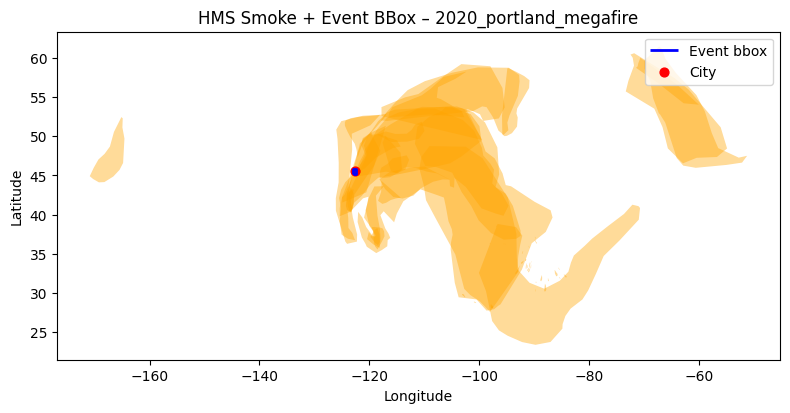

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

ev = [e for e in events_config if e["event_id"] == "2020_portland_megafire"][0]

bbox = make_bbox(ev["lat"], ev["lon"], buffer_deg=0.3)
nwlng, nwlat, selng, selat = bbox["nwlng"], bbox["nwlat"], bbox["selng"], bbox["selat"]

bbox_geom = box(nwlng, selat, selng, nwlat)

bbox_gdf = gpd.GeoDataFrame(
    {"event_id": [ev["event_id"]]},
    geometry=[bbox_geom],
    crs="EPSG:4326"
)

city_gdf = gpd.GeoDataFrame(
    {"label": ["NYC"]},
    geometry=gpd.points_from_xy([ev["lon"]], [ev["lat"]]),
    crs="EPSG:4326"
)

plt.figure(figsize=(8, 6))
ax = hms.plot(
    edgecolor="none",
    facecolor="orange",
    alpha=0.4,
    figsize=(8,6)
)
bbox_gdf.boundary.plot(ax=ax, edgecolor="blue", linewidth=2, label="Event bbox")
city_gdf.plot(ax=ax, color="red", markersize=40, label="City")

plt.legend()
plt.title(f"HMS Smoke + Event BBox – {ev['event_id']}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [ ]:
hourly_all_events

,time_hour,pm25,pm25_out_corr,IR,date,smoke_flag,station,temp_c,dew_c,slp_hpa,vis_m,wind_dir_deg,wind_mps,event_id
0,2025-07-26 00:00:00+00:00,2.4,9.9,0.242424,2025-07-26,0,72505394728,28.3,21.7,1013.3,16093.0,260.0,1.5,2025_nyc_canadian_smoke
1,2025-07-26 01:00:00+00:00,2.3,9.8,0.234694,2025-07-26,0,72505394728,27.8,21.7,1013.5,16093.0,260.0,0.0,2025_nyc_canadian_smoke
2,2025-07-26 02:00:00+00:00,2.5,9.0,0.277778,2025-07-26,0,72505394728,27.8,21.7,1014.2,16093.0,260.0,2.1,2025_nyc_canadian_smoke
3,2025-07-26 03:00:00+00:00,2.2,7.7,0.285714,2025-07-26,0,72505394728,28.3,21.7,1014.4,16093.0,260.0,2.1,2025_nyc_canadian_smoke
4,2025-07-26 04:00:00+00:00,1.4,4.9,0.285714,2025-07-26,0,72505394728,27.8,21.1,1015.2,16093.0,260.0,0.0,2025_nyc_canadian_smoke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2018-11-18 19:00:00+00:00,30.9,70.3,0.439545,2018-11-18,0,99401699999,9.5,NaN,1019.3,NaN,40.0,4.6,2018_sf_camp_fire
438,2018-11-18 20:00:00+00:00,33.0,97.0,0.340206,2018-11-18,1,99401699999,9.5,NaN,1018.7,NaN,50.0,2.1,2018_sf_camp_fire
439,2018-11-18 21:00:00+00:00,34.7,129.3,0.268368,2018-11-18,0,99401699999,9.5,NaN,1018.1,NaN,90.0,1.5,2018_sf_camp_fire
440,2018-11-18 22:00:00+00:00,35.5,154.3,0.230071,2018-11-18,0,99401699999,12.7,NaN,1017.9,NaN,90.0,1.0,2018_sf_camp_fire


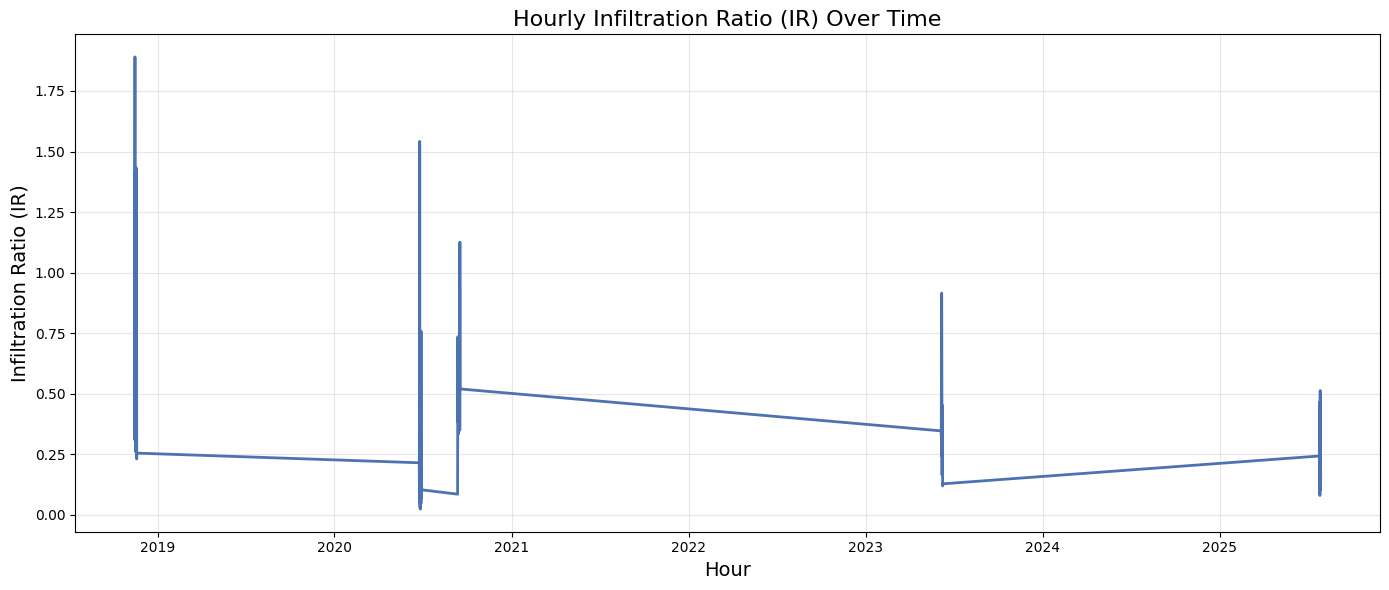

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(
    data=hourly_all_events,
    x="time_hour",
    y="IR",
    color="#4c72b0",
    linewidth=2
)

plt.title("Hourly Infiltration Ratio (IR) Over Time", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Infiltration Ratio (IR)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


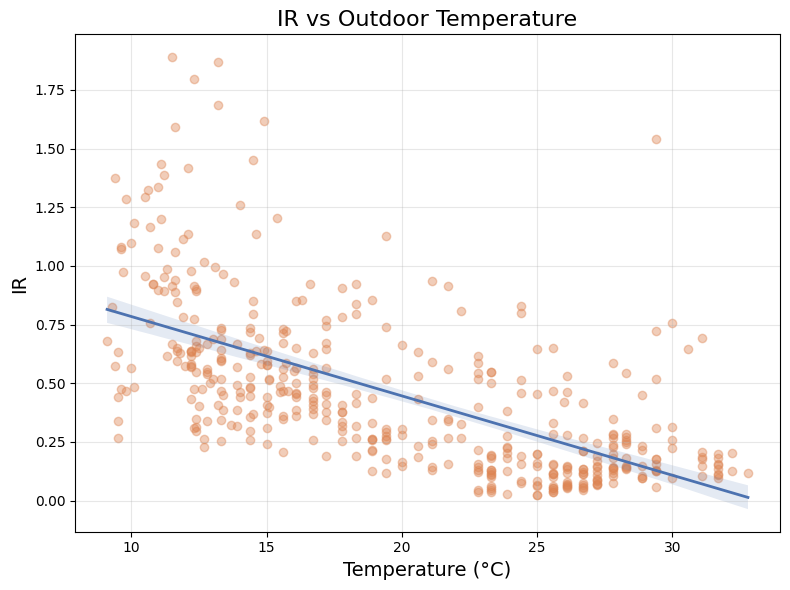

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=hourly_all_events,
    x="temp_c",
    y="IR",
    scatter_kws={"alpha":0.4, "color":"#dd8452"},
    line_kws={"color":"#4c72b0", "linewidth":2}
)

plt.title("IR vs Outdoor Temperature", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("IR", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


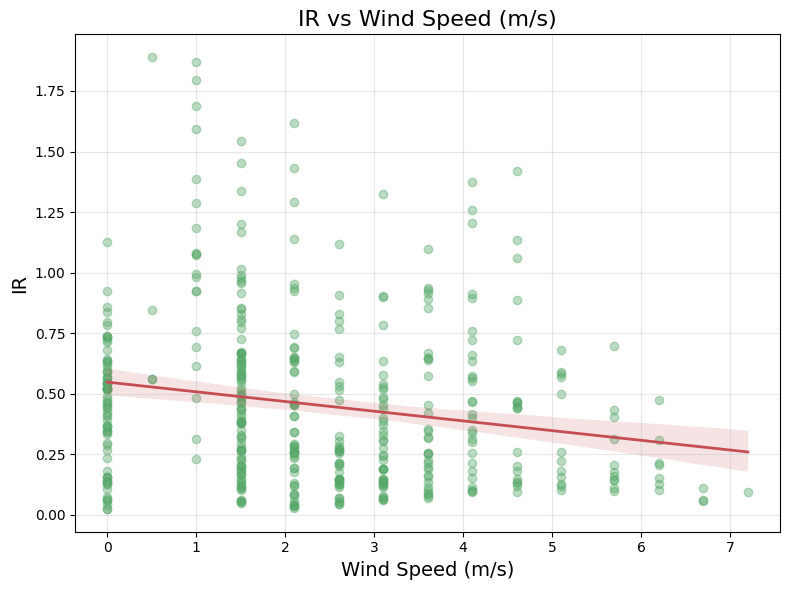

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=hourly_all_events,
    x="wind_mps",
    y="IR",
    scatter_kws={"alpha":0.4, "color":"#55a868"},
    line_kws={"color":"#c44e52", "linewidth":2}
)

plt.title("IR vs Wind Speed (m/s)", fontsize=16)
plt.xlabel("Wind Speed (m/s)", fontsize=14)
plt.ylabel("IR", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


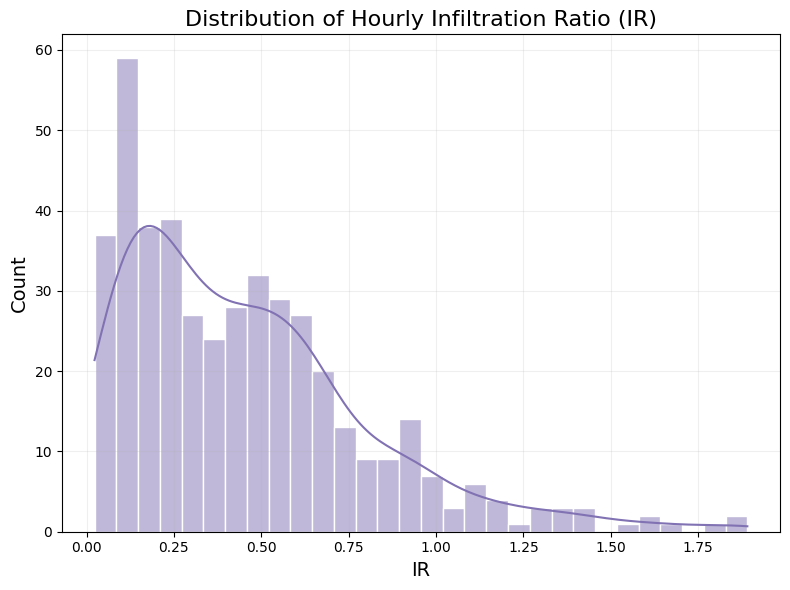

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    hourly_all_events["IR"],
    bins=30,
    kde=True,
    color="#8172b3",
    edgecolor="white"
)

plt.title("Distribution of Hourly Infiltration Ratio (IR)", fontsize=16)
plt.xlabel("IR", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


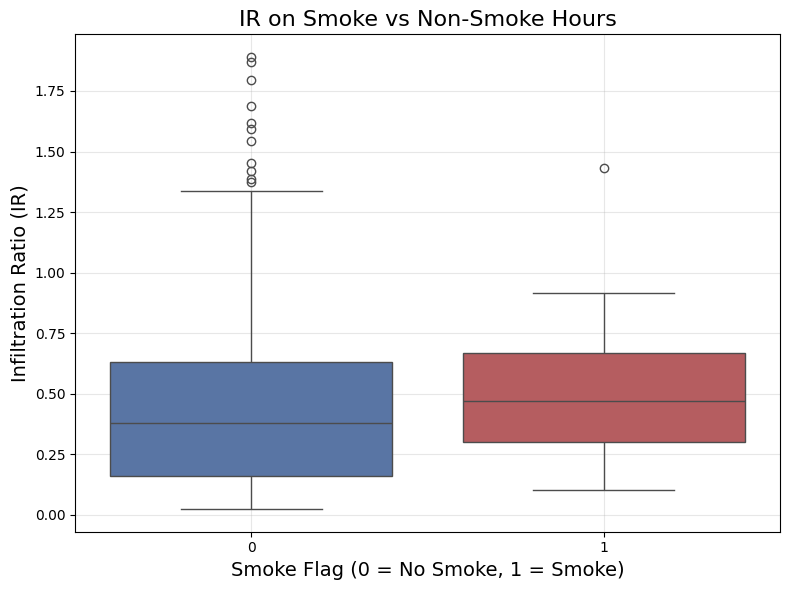

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.boxplot(
    data=hourly_all_events,
    x="smoke_flag",
    y="IR",
    palette=["#4c72b0", "#c44e52"]   # non-smoke, smoke
)

plt.title("IR on Smoke vs Non-Smoke Hours", fontsize=16)
plt.xlabel("Smoke Flag (0 = No Smoke, 1 = Smoke)", fontsize=14)
plt.ylabel("Infiltration Ratio (IR)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


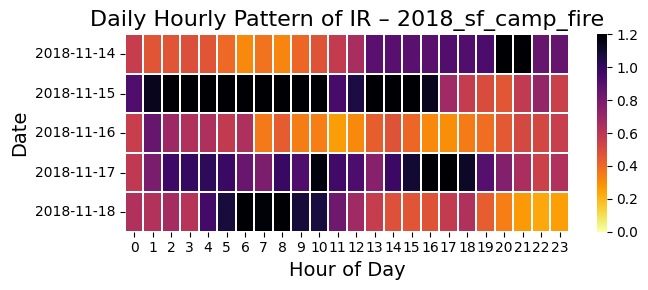

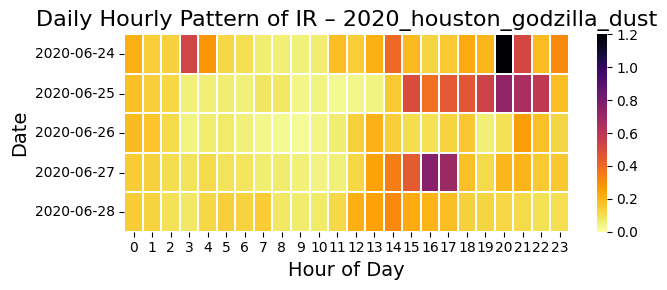

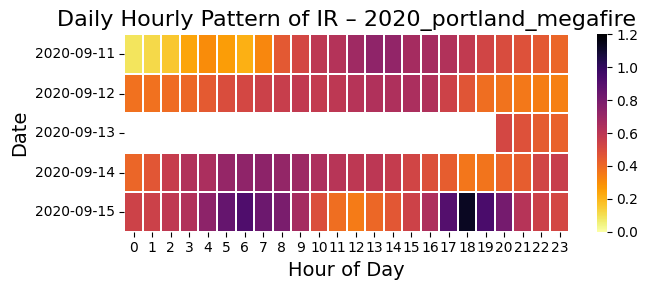

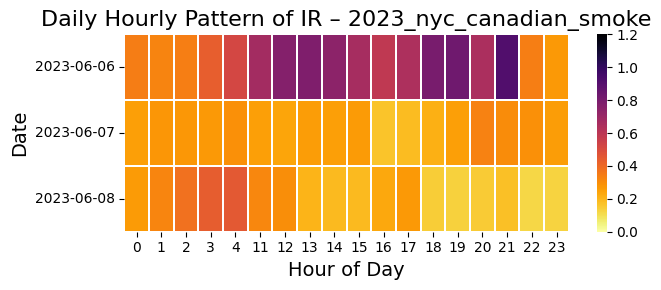

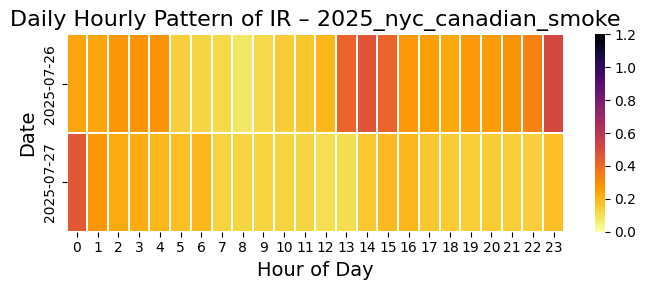

In [ ]:
df = hourly_all_events.copy()
df["hour"] = df["time_hour"].dt.hour

for ev_id, df_ev in df.groupby("event_id"):
    pivot = df_ev.pivot_table(
        index="date",
        columns="hour",
        values="IR",
        aggfunc="mean"
    ).sort_index()


    if pivot.isna().all().all():
        continue

    plt.figure(figsize=(7, 3))
    sns.heatmap(
        pivot,
        cmap="inferno_r",
        linewidths=0.3,
        linecolor="white",
        vmin=0,
        vmax=1.2
    )

    plt.title(f"Daily Hourly Pattern of IR – {ev_id}", fontsize=16)
    plt.xlabel("Hour of Day", fontsize=14)
    plt.ylabel("Date", fontsize=14)
    plt.tight_layout()
    plt.show()
